# Методы обработки и распознавания изображений 

## Практическое занятие 1: Введение в PyTorch

Сегодня мы познакомимся с библиотекой **PyTorch**. Она очень похожа на **NumPy**, с одним важным отличием — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет писать обратный проход в нейросетях.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

C:\Users\SNTkachenko\Anaconda3_2011\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1. Сравнение **NumPy** и **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.93735107, 0.31892892, 0.06420857],
       [0.71899016, 0.25309397, 0.1602174 ],
       [0.37501248, 0.16824189, 0.39595481],
       [0.66277465, 0.52970662, 0.40176477],
       [0.12893279, 0.11205263, 0.3929182 ]])

In [3]:
# размеры массива
a.shape

(5, 3)

In [4]:
# сложение
a + 5

array([[5.93735107, 5.31892892, 5.06420857],
       [5.71899016, 5.25309397, 5.1602174 ],
       [5.37501248, 5.16824189, 5.39595481],
       [5.66277465, 5.52970662, 5.40176477],
       [5.12893279, 5.11205263, 5.3929182 ]])

In [5]:
# матричное умножение
a @ a.T

array([[0.98446543, 0.76495252, 0.43059925, 0.81598803, 0.18182083],
       [0.76495252, 0.60667303, 0.37565014, 0.67496371, 0.18401358],
       [0.43059925, 0.37565014, 0.32571991, 0.4967483 , 0.2227812 ],
       [0.81598803, 0.67496371, 0.4967483 , 0.88127427, 0.30266909],
       [0.18182083, 0.18401358, 0.2227812 , 0.30266909, 0.18356417]])

In [6]:
# среднее по колонкам
a.mean(axis=-1)

array([0.44016285, 0.37743384, 0.31306973, 0.53141535, 0.21130121])

In [7]:
# решейп
a.reshape(3, 5).shape

(3, 5)

#### Разминка

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [8]:
# YOUR CODE

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [8]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.4528, 0.0029, 0.3485],
        [0.8736, 0.9935, 0.6619],
        [0.9980, 0.5366, 0.5366],
        [0.8365, 0.1910, 0.6753],
        [0.9053, 0.2032, 0.7880]])

In [9]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [10]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [11]:
# сложение
x + 5

tensor([[5.4528, 5.0029, 5.3485],
        [5.8736, 5.9935, 5.6619],
        [5.9980, 5.5366, 5.5366],
        [5.8365, 5.1910, 5.6753],
        [5.9053, 5.2032, 5.7880]])

In [13]:
# матричное умножение
# читайте документацию по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[0.3265, 0.6291, 0.6405, 0.6147, 0.6851],
        [0.6291, 2.1884, 1.7601, 1.3675, 1.5143],
        [0.6405, 1.7601, 1.5719, 1.2997, 1.4353],
        [0.6147, 1.3675, 1.2997, 1.1922, 1.3282],
        [0.6851, 1.5143, 1.4353, 1.3282, 1.4817]])

In [14]:
# очередное матричное умножение
x.mm(x.t())

tensor([[0.3265, 0.6291, 0.6405, 0.6147, 0.6851],
        [0.6291, 2.1884, 1.7601, 1.3675, 1.5143],
        [0.6405, 1.7601, 1.5719, 1.2997, 1.4353],
        [0.6147, 1.3675, 1.2997, 1.1922, 1.3282],
        [0.6851, 1.5143, 1.4353, 1.3282, 1.4817]])

In [15]:
# поэлементное умножение
x * x

tensor([[2.0504e-01, 8.3972e-06, 1.2146e-01],
        [7.6314e-01, 9.8707e-01, 4.3815e-01],
        [9.9607e-01, 2.8791e-01, 2.8791e-01],
        [6.9967e-01, 3.6494e-02, 4.5605e-01],
        [8.1951e-01, 4.1299e-02, 6.2088e-01]])

In [16]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.2681, 0.8430, 0.6904, 0.5676, 0.6321])

In [17]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [18]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [19]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [20]:
# YOUR CODE

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [21]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[9.3674e-39, 9.9184e-39, 8.7245e-39],
        [9.2755e-39, 8.9082e-39, 9.9184e-39],
        [8.4490e-39, 9.6429e-39, 1.0653e-38],
        [1.0469e-38, 4.2246e-39, 1.0378e-38],
        [9.6429e-39, 9.2755e-39, 1.0928e-38]])

In [22]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.0284, 0.0481, 0.6877],
        [0.5802, 0.5990, 0.1649],
        [0.3165, 0.8104, 0.0322],
        [0.2029, 0.9638, 0.9423],
        [0.5508, 0.2585, 0.6520]])

In [23]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [24]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [25]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [26]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[-0.0575,  0.1643, -0.0550],
        [ 0.0522, -1.6814,  0.1503],
        [-0.3847, -0.0521,  0.2159],
        [-1.9751,  0.3400,  1.4571],
        [-0.4192,  1.2175,  0.4754]])

In [27]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [28]:
x

tensor([[0.8329, 0.2608, 0.0497],
        [0.2713, 0.1934, 0.2195],
        [0.2198, 0.5552, 0.7820],
        [0.6003, 0.8136, 0.3922],
        [0.5323, 0.4946, 0.7240]])

In [29]:
y

tensor([[0.1366, 0.7769, 0.6347],
        [0.0908, 0.6578, 0.2546],
        [0.7486, 0.1118, 0.2544],
        [0.0589, 0.8341, 0.8757],
        [0.3915, 0.1057, 0.5028]])

In [30]:
# сложение
x + y

tensor([[0.9695, 1.0377, 0.6843],
        [0.3621, 0.8512, 0.4741],
        [0.9685, 0.6670, 1.0364],
        [0.6592, 1.6477, 1.2679],
        [0.9237, 0.6002, 1.2267]])

In [31]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[0.9695, 1.0377, 0.6843],
        [0.3621, 0.8512, 0.4741],
        [0.9685, 0.6670, 1.0364],
        [0.6592, 1.6477, 1.2679],
        [0.9237, 0.6002, 1.2267]])

In [32]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[0.9695, 1.0377, 0.6843],
        [0.3621, 0.8512, 0.4741],
        [0.9685, 0.6670, 1.0364],
        [0.6592, 1.6477, 1.2679],
        [0.9237, 0.6002, 1.2267]])

In [35]:
# добавили измерение в начало
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [36]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [37]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [38]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [39]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [40]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [41]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [42]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

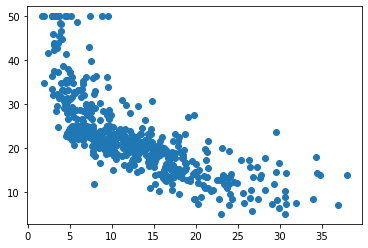

In [43]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

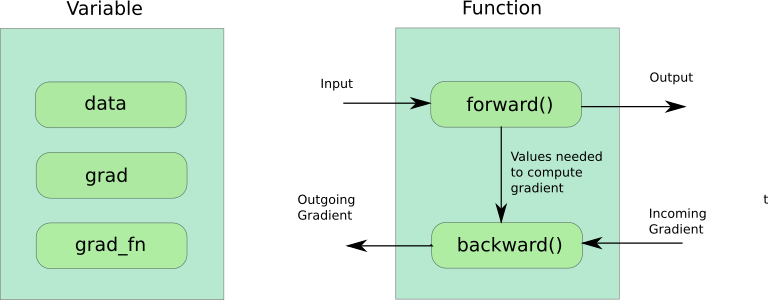

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [44]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [45]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [46]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [47]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-12.0545])
dL/db = tensor([-43.9611])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [48]:
w.data, w.grad

(tensor([0.6829]), tensor([-12.0545]))

In [49]:
w

tensor([0.6829], requires_grad=True)

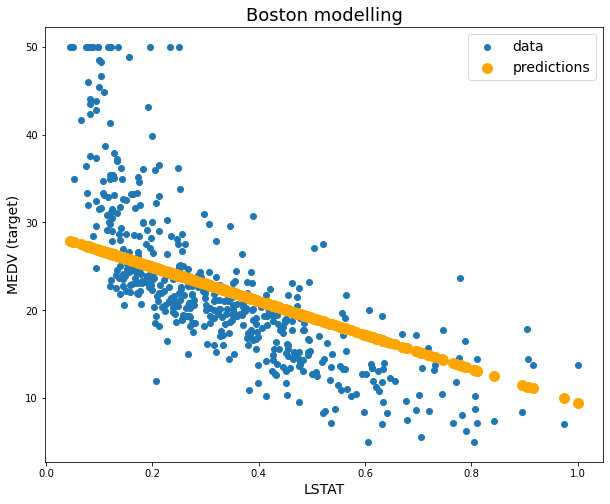

loss =  48.428074


In [50]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [51]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [52]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [53]:
our_dataset = RandomDataset(x, y)

In [55]:
our_dataset.__getitem__(999)

{'sample': tensor([0.2066, 0.3762, 0.0725, 0.4978, 0.7877]),
 'target': 0.983552792330602}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Посмотрим на пример:

In [56]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [57]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.6577, 0.1485, 0.5791, 0.0114, 0.3379],
        [0.5084, 0.3077, 0.0563, 0.1114, 0.5938],
        [0.9252, 0.9748, 0.5497, 0.4033, 0.1794],
        [0.0190, 0.8664, 0.5569, 0.1385, 0.9849]])
Target:
tensor([0.1470, 0.5170, 0.5850, 0.0056], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [58]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [59]:
y_pred = model(batch["sample"])  # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [60]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

C:\Users\SNTkachenko\Anaconda3_2011\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


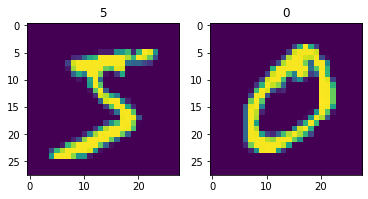

In [61]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [62]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [63]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[ 0.0351, -0.0069,  0.0145,  ...,  0.0152,  0.0050,  0.0240],
          [-0.0315, -0.0120, -0.0250,  ..., -0.0285,  0.0257,  0.0255],
          [-0.0065, -0.0129, -0.0349,  ..., -0.0105, -0.0329, -0.0180],
          ...,
          [-0.0331, -0.0014,  0.0179,  ...,  0.0302,  0.0010, -0.0075],
          [ 0.0066, -0.0233,  0.0023,  ...,  0.0177, -0.0349,  0.0137],
          [ 0.0205, -0.0166,  0.0348,  ...,  0.0249,  0.0086, -0.0212]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 0.0248,  0.0346,  0.0282, -0.0256,  0.0264,  0.0319, -0.0098,  0.0317,
          -0.0277, -0.0324, -0.0278, -0.0193, -0.0119, -0.0144, -0.0017,  0.0249,
           0.0100, -0.0320,  0.0149,  0.0323,  0.0270, -0.0213,  0.0319, -0.0047,
          -0.0317, -0.0229,  0.0055,  0.0157,  0.0056,  0.0044,  0.0080,  0.0127,
           0.0200,  0.0288,  0.0241, -0.0275, -0.0057,  0.0331,  0.0278,  0.0351,
           0.0144, -0.0252,  0.0275, 

In [64]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train)  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val)  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.10448698699474335, accuracy: 0.9682


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08673213422298431, accuracy: 0.9731


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.0849250853061676, accuracy: 0.9758


ДЗ: Вам необходимо переписать алгоритм обучения нейронной сети, с целью повышения значения accuracy. Можно пробовать оптимизировать код, саму нейронку или параметры обучения.